In [ ]:
!pip install plotly==4.14.3
!pip install pycountry
!pip install plotly-express

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ROOT_FOLDER = '/content/drive/Shareddrives/NLP2/Project'

In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import pycountry

In [6]:
full_df = pd.read_csv(os.path.join(ROOT_FOLDER, 'data', 'full_final.csv'))

In [8]:
def get_country_to_alpha3(name):
    if name == 'Czech Republic':
        return 'CZE'
    if name == 'Russia':
        return 'RUS'
    try:
        return pycountry.countries.get(name=name).alpha_3
    except:
        return None

full_df['alpha3'] = full_df['country'].apply(lambda c: get_country_to_alpha3(c))

In [9]:
def sorter(x):
  if x == 'before':
    return 0
  elif x == 'during':
    return 1
  else:
    return 2

## General results

In [10]:
tmp_df = full_df.copy()
tmp_df = tmp_df.groupby(['period', 'label']).agg({'label': 'count'})
tmp_df = tmp_df.rename(columns={'label': 'count'})
tmp_df = tmp_df.reset_index()
tmp_df = tmp_df.set_index(['period'])
sum_df = tmp_df.groupby(['period']).agg(total=('count', 'sum'))['total']
tmp_df = tmp_df.assign(sum=sum_df)
tmp_df['sent_ratio'] = tmp_df['count'] / tmp_df['sum']
tmp_df = tmp_df.sort_values('period', key=lambda x: x.map(sorter))
tmp_df = tmp_df[tmp_df['label']=='POSITIVE'].reset_index()

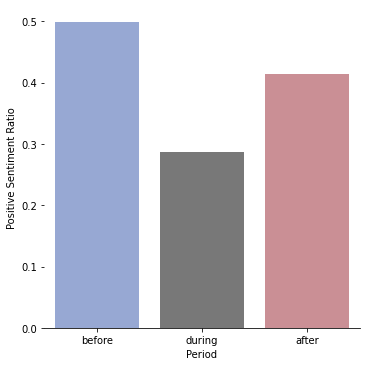

In [11]:
g = sns.catplot(
    data=tmp_df, kind="bar",
    x="period", y="sent_ratio",
     palette="icefire", alpha=.6
)
g.despine(left=True)
g.set_axis_labels("Period", "Positive Sentiment Ratio")

## Map Visulization

In [12]:
tmp_df = full_df.copy()
tmp_df = tmp_df.groupby(['period', 'alpha3', 'new_label']).agg({'new_label': 'count'})
tmp_df = tmp_df.rename(columns={'new_label': 'count'})
tmp_df = tmp_df.reset_index()
tmp_df = tmp_df.set_index(['period', 'alpha3'])
sum_df = tmp_df.groupby(['period', 'alpha3']).agg(total=('count', 'sum'))['total']
tmp_df = tmp_df.assign(sum=sum_df)
tmp_df['sent_ratio'] = tmp_df['count'] / tmp_df['sum']
tmp_df = tmp_df[tmp_df['new_label']=='POSITIVE'].reset_index()
tmp_df = tmp_df.sort_values('period', key=lambda x: x.map(sorter))
tmp_df['dot_size'] = 0

In [13]:
fig = px.choropleth(tmp_df, locations='alpha3', locationmode='ISO-3', animation_frame='period', color='sent_ratio', range_color=[0, 1])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(
    center=dict(lon=30, lat=30),
    lataxis_range=[-50,-20], lonaxis_range=[0, 100]
)
fig.add_trace(px.scatter_geo(tmp_df[['alpha3', 'dot_size']], locations="alpha3", locationmode='ISO-3', text='alpha3', size='dot_size').data[0].update(textfont_color='red'))
fig.show()

In [14]:
tmp_df = full_df.copy()
tmp_df = tmp_df.value_counts(['alpha3'])
tmp_df = tmp_df.reset_index(name='size')
tmp_df['dot_size'] = 0

In [15]:
fig = px.choropleth(tmp_df, locations='alpha3', locationmode='ISO-3', color='size', color_continuous_scale='turbo', range_color=[0, 10000])
fig.update_geos(
    center=dict(lon=10, lat=30),
    lataxis_range=[-50,-20], lonaxis_range=[0, 100]
)
fig.add_trace(px.scatter_geo(tmp_df[['alpha3', 'dot_size']], locations="alpha3", locationmode='ISO-3', text='alpha3', size='dot_size').data[0].update(textfont_color='red'))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

## Results by country

### Sentiment

In [16]:
tmp_df = full_df.copy()
tmp_df = tmp_df.groupby(['period', 'country', 'label']).agg({'label': 'count'})
tmp_df = tmp_df.rename(columns={'label': 'count'})
tmp_df = tmp_df.reset_index()
tmp_df = tmp_df.set_index(['period', 'country'])
sum_df = tmp_df.groupby(['period', 'country']).agg(total=('count', 'sum'))['total']
tmp_df = tmp_df.assign(sum=sum_df)
tmp_df['sent_ratio'] = tmp_df['count'] / tmp_df['sum']
tmp_df = tmp_df.sort_values('period', key=lambda x: x.map(sorter))
tmp_df = tmp_df[tmp_df['label']=='POSITIVE'].reset_index()

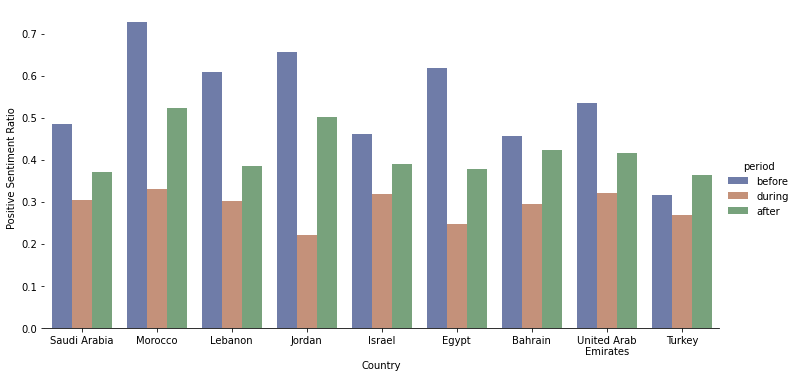

In [17]:
g = sns.catplot(
    data=tmp_df, kind="bar",
    x="country", y="sent_ratio", hue='period',
     palette="dark", alpha=.6, aspect=2
)
g.despine(left=True)
g.set_axis_labels("Country", "Positive Sentiment Ratio")
labels = tmp_df['country'].unique().tolist()
for i in range(len(labels)):
  if labels[i] == 'United Arab Emirates':
    labels[i] = 'United Arab\nEmirates'
g.set_xticklabels(labels)

### Profanity

In [19]:
tmp_df = full_df.copy()
tmp_df = tmp_df.groupby(['period', 'country', 'label']).agg({'profanity': 'count'})
tmp_df = tmp_df.rename(columns={'profanity': 'count'})
tmp_df = tmp_df.reset_index()
tmp_df = tmp_df.set_index(['period', 'country'])
sum_df = tmp_df.groupby(['period', 'country']).agg(total=('count', 'sum'))['total']
tmp_df = tmp_df.assign(sum=sum_df)
tmp_df['profanity_ratio'] = tmp_df['count'] / tmp_df['sum']
tmp_df = tmp_df.sort_values('period', key=lambda x: x.map(sorter))
tmp_df = tmp_df.reset_index()
tmp_df = tmp_df[tmp_df['label']=='NEGATIVE']

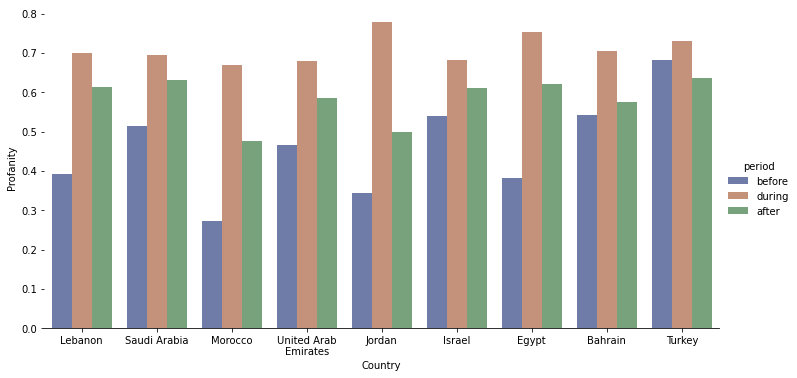

In [20]:
g = sns.catplot(
    data=tmp_df, kind="bar", x="country", y="profanity_ratio", hue='period',
    palette="dark", alpha=.6, aspect=2
)
g.despine(left=True)
g.set_axis_labels("Country", "Profanity")
labels = tmp_df['country'].unique().tolist()
for i in range(len(labels)):
  if labels[i] == 'United Arab Emirates':
    labels[i] = 'United Arab\nEmirates'
g.set_xticklabels(labels)

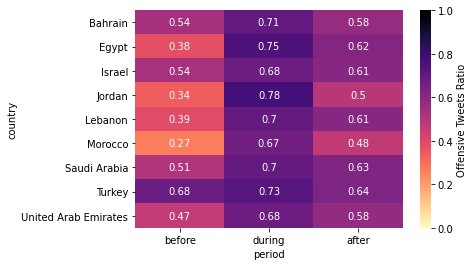

In [21]:
tmp_df = tmp_df.pivot('country', 'period', 'profanity_ratio')
sns.heatmap(tmp_df[['before', 'during', 'after']], annot=True, cmap='magma_r', cbar_kws={'label': 'Offensive Tweets Ratio'}, vmin=0, vmax=1)

## Results by Language

Sentiment

In [22]:
tmp_df = full_df.copy()
tmp_df = tmp_df.groupby(['period', 'orig_lang', 'label']).agg({'label': 'count'})
tmp_df = tmp_df.rename(columns={'label': 'count'})
tmp_df = tmp_df.reset_index()
tmp_df = tmp_df.set_index(['period', 'orig_lang'])
sum_df = tmp_df.groupby(['period', 'orig_lang']).agg(total=('count', 'sum'))['total']
tmp_df = tmp_df.assign(sum=sum_df)
tmp_df['sent_ratio'] = tmp_df['count'] / tmp_df['sum']
tmp_df = tmp_df.sort_values('period', key=lambda x: x.map(sorter))
tmp_df = tmp_df[tmp_df['label']=='POSITIVE'].reset_index()

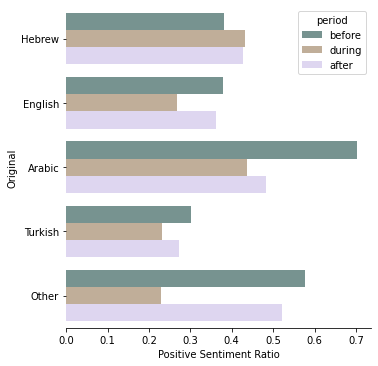

In [23]:
g = sns.catplot(
    data=tmp_df, kind="bar",
    x="sent_ratio", y="orig_lang", hue='period',
    palette="cubehelix", alpha=.6, aspect=1, legend_out=False
)
g.despine(left=True)
g.set_axis_labels("Positive Sentiment Ratio", "Original")
labels = tmp_df['orig_lang'].unique().tolist()
labels = ['Hebrew', 'English', 'Arabic', 'Turkish', 'Other']
g.set_yticklabels(labels)

### Profanity

In [24]:
tmp_df = full_df.copy()
tmp_df = tmp_df.groupby(['period', 'orig_lang', 'label']).agg({'profanity': 'count'})
tmp_df = tmp_df.rename(columns={'profanity': 'count'})
tmp_df = tmp_df.reset_index()
tmp_df = tmp_df.set_index(['period', 'orig_lang'])
sum_df = tmp_df.groupby(['period', 'orig_lang']).agg(total=('count', 'sum'))['total']
tmp_df = tmp_df.assign(sum=sum_df)
tmp_df['profanity_ratio'] = tmp_df['count'] / tmp_df['sum']
tmp_df = tmp_df.sort_values('period', key=lambda x: x.map(sorter))
tmp_df = tmp_df.reset_index()
tmp_df = tmp_df[tmp_df['label']=='NEGATIVE']

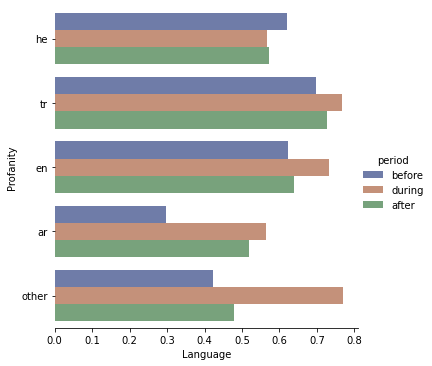

In [25]:
g = sns.catplot(
    data=tmp_df, kind="bar", y="orig_lang", x="profanity_ratio", hue='period',
    palette="dark", alpha=.6, aspect=1
)
g.despine(left=True)
g.set_axis_labels("Language", "Profanity")

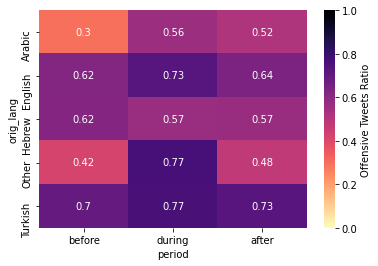

In [26]:
tmp_df = tmp_df.pivot('orig_lang', 'period', 'profanity_ratio')
sns.heatmap(tmp_df[['before', 'during', 'after']], annot=True, cmap='magma_r', 
            cbar_kws={'label': 'Offensive Tweets Ratio'}, vmin=0, vmax=1,
            yticklabels=['Arabic', 'English', 'Hebrew', 'Other', 'Turkish'])

## Word Cloud

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

def draw_word_cloud(words_list, min_times=10):
    stopwords = set(STOPWORDS) 
    stopwords_parts = {"'s", " ' s'", " `s" }
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10)
    def skip_entity(e):
        if e in stopwords:
            return True
        for p in stopwords_parts:
            if p in e:
                return True
        return False
    c = Counter(words_list)
    # using the subject frquencies
    d = {k:v for k,v in dict(c).items() if v > min_times and not skip_entity(k)}
    wordcloud.generate_from_frequencies(d)
    plt.figure(figsize = (20, 20), facecolor = None) 
    plt.imshow(wordcloud)

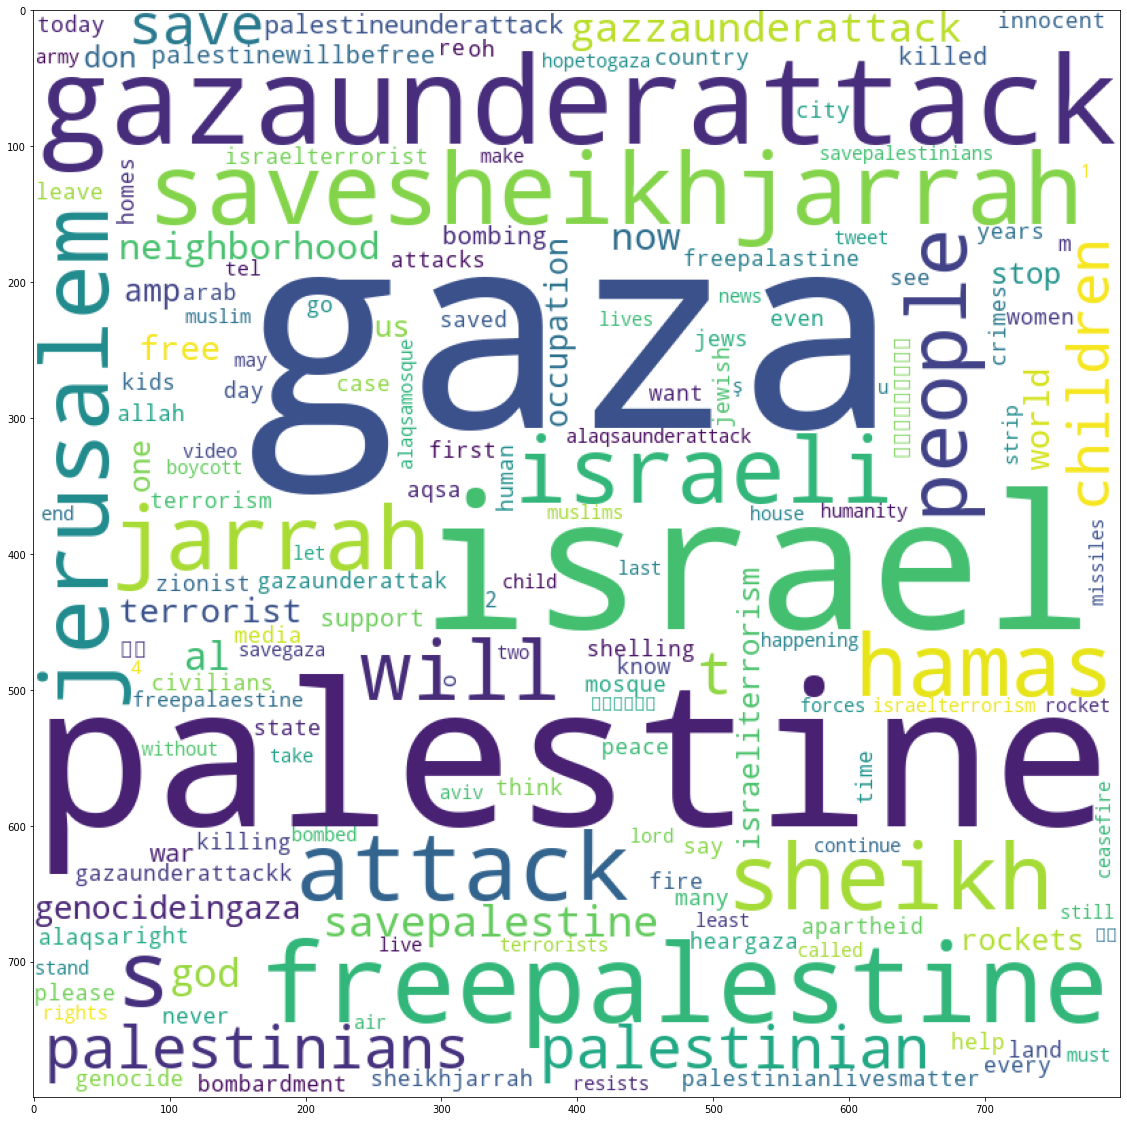

In [28]:
import re

find_most_popular_hashtag = []
for text in full_df[(full_df['period'] == 'during') & (full_df['label'] == 'NEGATIVE')]['trans_text'].unique().tolist():
    hashtags = re.findall(r"(\w+)", text.lower())
    find_most_popular_hashtag += hashtags

draw_word_cloud(find_most_popular_hashtag, min_times=5)